In [1]:
import json
import openpyxl

json_file = "swiggy_data.json"

json_data = open(json_file).read()

parsed_data = json.loads(json_data)

print(parsed_data.values())

dict_values([{'order_details': {'order_no': '#41356117094', 'order_date': '19/05/2019', 'order_time': '09:18', 'order_am_pm': 'PM', 'order_status': 'Delivered', 'order_total': '149', 'gst': '5.96', 'packing_charge': '10', 'delivery_charge': '0'}, 'place_details': {'place_name': 'UBQ by Barbeque Nation', 'place_address': 'No 1/4,Ground Floor, Swami Vivekanand Road, Lido Multiplex,Ulsoor ,Bangalore, Karnataka, 560008.'}, 'ordered_item_details': [{'name': 'Murgh Mussallam Combo', 'price': '149', 'quantity': '1'}], 'recepient_address': 'Hasan Jaaga 5/1, Penthouse 01, 6th Floor, Rich Homes Apartment, Richmond Road, Shanthala Nagar, Ashok Naga, 6/1, Shanthala Nagar, Richmond Town, Bengaluru, Karnataka 560025, India'}, {'order_details': {'order_no': '#37096133700', 'order_date': '31/03/2019', 'order_time': '01:58', 'order_am_pm': 'PM', 'order_status': 'Delivered', 'order_total': '138', 'delivery_charge': '0'}, 'place_details': {'place_name': 'Goli Vada pav', 'place_address': 'No 72/1 mg road'

In [16]:
import pandas as pd

df_list = []

first_value = list(parsed_data.values())[0]

count = 0

for value in parsed_data.values():
    count += 1
    value_df = pd.DataFrame(value["order_details"], index = [count])
    df_list.append(value_df)
    
# print(df_list)
final_dataframe = pd.concat(df_list, sort = True)

# final_dataframe['order_date'] = pd.to_datetime(final_dataframe['order_date'])

# final_dataframe['order_total'] = pd.to_numeric(final_dataframe['order_total'])

# final_dataframe['order_time'] = pd.to_datetime(final_dataframe['order_time'])

final_dataframe["order_datetime"] = final_dataframe["order_date"] + " " + final_dataframe["order_time"] + " " + final_dataframe["order_am_pm"]


# print(final_dataframe)

final_dataframe['order_datetime'] = pd.to_datetime(final_dataframe['order_datetime'], format = "%d/%m/%Y %I:%M %p")
final_dataframe['order_total'] = pd.to_numeric(final_dataframe['order_total'])


# print(final_dataframe.tail())
print(final_dataframe)


# final_dataframe.to_csv("swiggy_data.csv")
# final_dataframe.to_excel("swiggy_data.xlsx")

   delivery_charge    gst order_am_pm  order_date      order_no order_status  \
1                0   5.96          PM  19/05/2019  #41356117094    Delivered   
2                0    NaN          PM  31/03/2019  #37096133700    Delivered   
3                0   6.45          PM  20/05/2019  #41418314131    Delivered   
4                0    NaN          PM  24/05/2019  #41789356811    Delivered   
5                0   4.74          PM  29/03/2019  #36946068426    Delivered   
6                0    NaN          PM  09/05/2019  #40487698403    Delivered   
7                0   5.95          AM  17/05/2019  #41137853274    Delivered   
8                0   10.4          PM  26/05/2019  #41959810929    Delivered   
9                0    NaN          PM  31/05/2019  #42373671178    Delivered   
10              50     11          PM  21/03/2019  #36263755890    Delivered   
11               0    7.5          AM  24/05/2019  #41754132318    Delivered   
12               0    NaN          AM  2

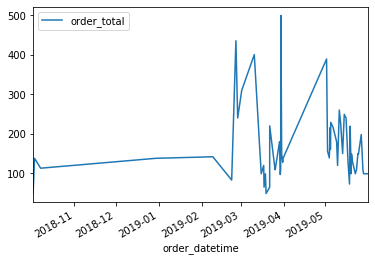

In [6]:
import matplotlib.pyplot as plt

sorted_df = final_dataframe.sort_values(by=["order_datetime"])

sorted_df.plot(x="order_datetime", y="order_total")

{10: 300.0, 12: 138.0, 2: 899.9, 3: 3435.75, 5: 4742.0}
   months    total
0      10   300.00
1      12   138.00
2       2   899.90
3       3  3435.75
4       5  4742.00


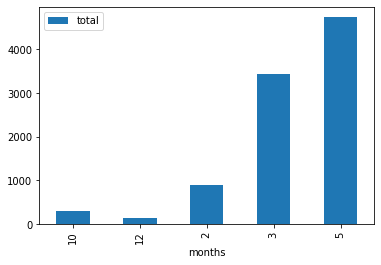

In [22]:
#MONTHLY PLOT

order_price_over_months = {}

for index, row in sorted_df.iterrows():
    
#     print(row["order_total"], row["order_datetime"].month)
    
    price = row["order_total"]
    month = row["order_datetime"].month
    if month in list(order_price_over_months.keys()):
        order_price_over_months[month] += price
    else:
        order_price_over_months[month] = price
        
print(order_price_over_months)
    
table_order_month_price = {}

table_order_month_price["months"] = list(order_price_over_months.keys())
table_order_month_price["total"] = list(order_price_over_months.values())

month_total_df = pd.DataFrame(table_order_month_price)
print(month_total_df)
month_total_df.plot(kind = "bar",x="months", y="total")

{11: 459.0, 13: 821.0, 22: 932.0, 23: 279.9, 14: 1155.0, 21: 1657.0, 19: 409.0, 20: 730.5, 8: 178.0, 12: 216.0, 0: 1094.25, 7: 128.0, 15: 607.0, 3: 180.0, 1: 596.0, 10: 73.0}
    hours    total
0      11   459.00
1      13   821.00
2      22   932.00
3      23   279.90
4      14  1155.00
5      21  1657.00
6      19   409.00
7      20   730.50
8       8   178.00
9      12   216.00
10      0  1094.25
11      7   128.00
12     15   607.00
13      3   180.00
14      1   596.00
15     10    73.00


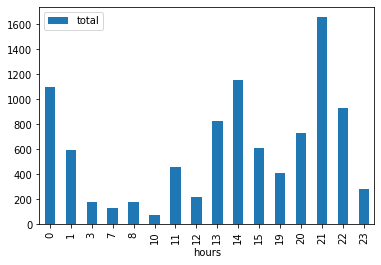

In [48]:
#HOURLY PLOT

order_price_over_hours = {}

for index, row in sorted_df.iterrows():
    
#     print(row["order_total"], row["order_datetime"].month)
    
    price = row["order_total"]
    hour = row["order_datetime"].hour
    if hour in list(order_price_over_hours.keys()):
        order_price_over_hours[hour] += price
    else:
        order_price_over_hours[hour] = price
        
print(order_price_over_hours)
    
table_order_hour_price = {}

table_order_hour_price["hours"] = list(order_price_over_hours.keys())
table_order_hour_price["total"] = list(order_price_over_hours.values())

hour_total_df = pd.DataFrame(table_order_hour_price)
print(hour_total_df)

sorted_hour_df = hour_total_df.sort_values(by=["hours"])

sorted_hour_df.plot(kind = "bar",x="hours", y="total")

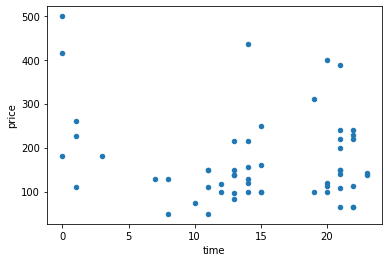

In [50]:
#SCATTER PLOT

order_over_time = {"time":[], "price":[]}

for index,row in sorted_df.iterrows():
    price = row["order_total"]
    time = row["order_datetime"].hour
    order_over_time["time"].append(time)
    order_over_time["price"].append(price)
    
order_over_time_df = pd.DataFrame(order_over_time)
order_over_time_df.plot(kind = "scatter", x = "time", y = "price")